In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Задание 1

df_need = pd.read_csv(r'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', header=None)

In [3]:
dict_col = {1: 'операция', 2: 'Возраст', 3: 'Номер_больницы', 4: 'ректальная_температура', 
            5: 'пульс', 6: 'частота_дыхания', 7: 'температура_конечностей', 8: 'периферический_пульс', 
            9: 'слизистые_оболочки', 10: 'время_наполнения_капилляров', 11: 'боль', 12: 'перистальтика', 
            13: 'вздутие_живота', 14: 'назогастральный_зонд', 15: 'назогастральный_рефлюкс', 
            16: 'назогастральный_рефлюкс_ЛГ', 17: 'ректальное_исследование', 18: 'живот', 
            19: 'объем_упакованных_клеток', 20: 'общий_белок', 21: 'внешний_вид_абдоминоцентеза', 
            22: 'общий_белок_абдомоцентеза', 23: 'исход', 24: 'хирургическое_поражение', 25: 'тип_поражения_1', 
            26: 'тип_поражения_2', 27: 'тип_поражения_3', 28: 'cp_data'}

In [4]:
df_need.columns = dict_col.values()

In [5]:
#surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome

df = df_need[['операция', 'Возраст', 'ректальная_температура', 'пульс', 
              'частота_дыхания', 'температура_конечностей', 'боль', 'исход']].copy()

In [6]:
df

,операция,Возраст,ректальная_температура,пульс,частота_дыхания,температура_конечностей,боль,исход
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [7]:
# Задание 2

In [8]:
df.dtypes

операция                   object
Возраст                     int64
ректальная_температура     object
пульс                      object
частота_дыхания            object
температура_конечностей    object
боль                       object
исход                      object
dtype: object

In [9]:
for col in df.columns:
    df[col] = df[col].astype('str') 
    df[col] = df[col].str.replace('?', '-9999') 
    df[col] = df[col].astype('float64')
    

<ipython-input-9-4b573182e8ca>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('?', '-9999')


In [10]:
df = df.replace(-9999, np.nan)

In [11]:
df

,операция,Возраст,ректальная_температура,пульс,частота_дыхания,температура_конечностей,боль,исход
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.5,100.0,24.0,3.0,3.0,1.0


In [12]:
df.describe()

,операция,Возраст,ректальная_температура,пульс,частота_дыхания,температура_конечностей,боль,исход
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


Text(0.5, 1.0, 'исход')

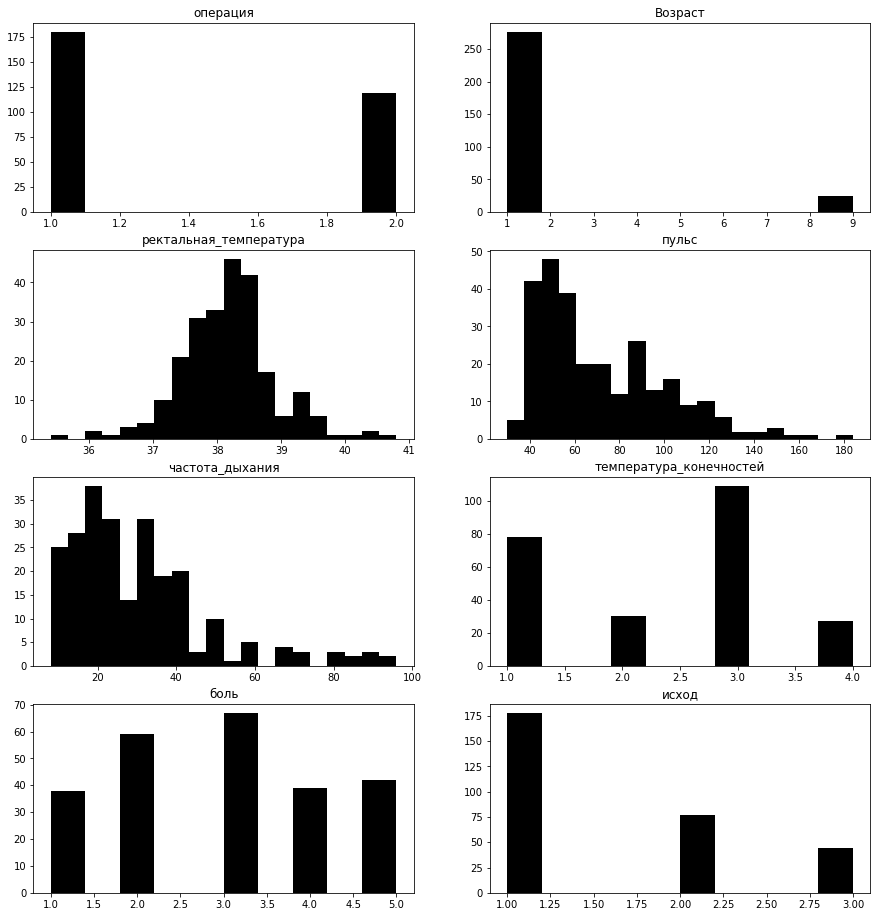

In [13]:
# распределение значений связанное с наличием/отсутствием операции

fig, axs = plt.subplots(3, 3, figsize=(15, 16))
                        
plt.subplot (4, 2, 1)
plt.hist(df.операция, color='black')  
plt.title ("операция")

plt.subplot (4, 2, 2)
plt.hist(df.Возраст, color='black')  
plt.title ("Возраст")

plt.subplot (4, 2, 3)
plt.hist(df.ректальная_температура, color='black', bins=20)  
plt.title ("ректальная_температура")

plt.subplot (4, 2, 4)
plt.hist(df.пульс, color='black', bins=20)  
plt.title ("пульс")

plt.subplot (4, 2, 5)
plt.hist(df.частота_дыхания, color='black', bins=20)  
plt.title ("частота_дыхания")

plt.subplot (4, 2, 6)
plt.hist(df.температура_конечностей, color='black')  
plt.title ("температура_конечностей")

plt.subplot (4, 2, 7)
plt.hist(df.боль, color='black')  
plt.title ("боль")

plt.subplot (4, 2, 8)
plt.hist(df.исход, color='black')  
plt.title ("исход")


(0.0, 100.0)

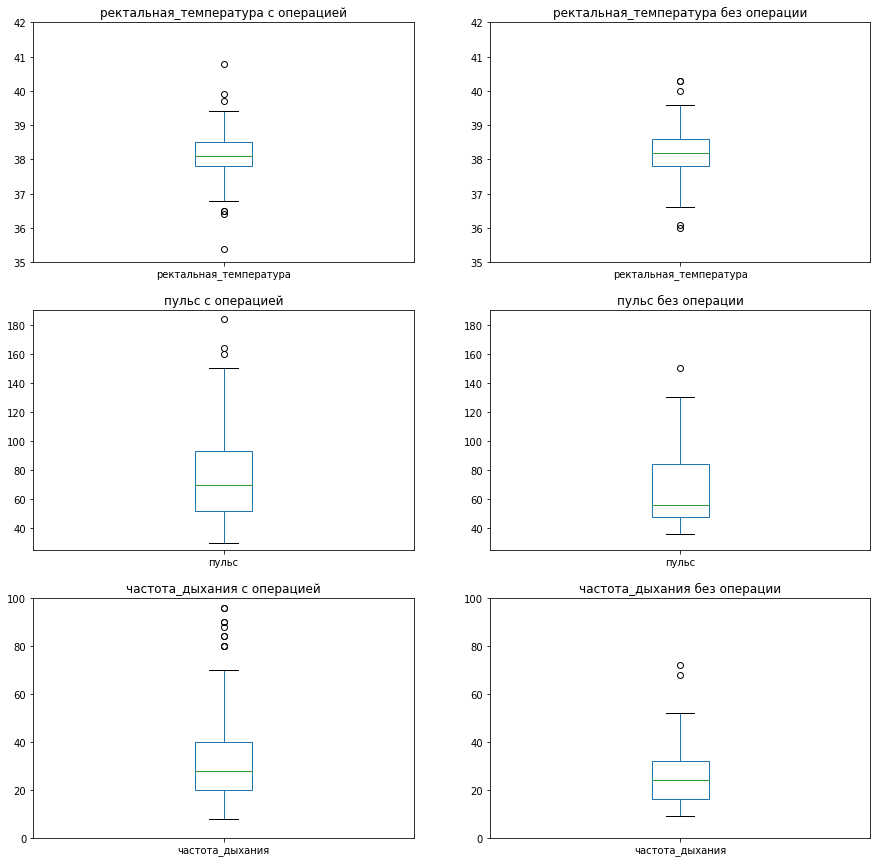

In [14]:
# выбросы по количественным переменным
# что есть выбросы - можно оценить по разному

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

plt.subplot (3, 2, 1)
df.loc[df.операция == 1, 'ректальная_температура'].plot(kind='box')
plt.title ("ректальная_температура с операцией")
plt.ylim([35, 42])

plt.subplot (3, 2, 2)
df.loc[df.операция == 2, 'ректальная_температура'].plot(kind='box')
plt.title ("ректальная_температура без операции")
plt.ylim([35, 42])

plt.subplot (3, 2, 3)
df.loc[df.операция == 1, 'пульс'].plot(kind='box')
plt.title ("пульс с операцией")
plt.ylim([25, 190])

plt.subplot (3, 2, 4)
df.loc[df.операция == 2, 'пульс'].plot(kind='box')
plt.title ("пульс без операции")
plt.ylim([25, 190])

plt.subplot (3, 2, 5)
df.loc[df.операция == 1, 'частота_дыхания'].plot(kind='box')
plt.title ("частота_дыхания с операцией")
plt.ylim([0, 100])

plt.subplot (3, 2, 6)
df.loc[df.операция == 2, 'частота_дыхания'].plot(kind='box')
plt.title ("частота_дыхания без операции")
plt.ylim([0, 100])

(25.0, 190.0)

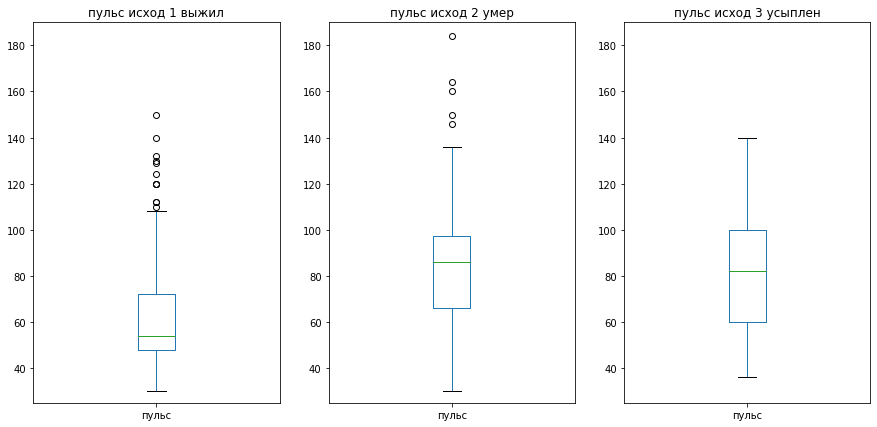

In [15]:
# пульс по исходам

fig, axs = plt.subplots(3, 2, figsize=(15, 7))

plt.subplot (1, 3, 1)
df.loc[df.исход == 1, 'пульс'].plot(kind='box')
plt.title ("пульс исход 1 выжил")
plt.ylim([25, 190])

plt.subplot (1, 3, 2)
df.loc[df.исход == 2, 'пульс'].plot(kind='box')
plt.title ("пульс исход 2 умер")
plt.ylim([25, 190])

plt.subplot (1, 3, 3)
df.loc[df.исход == 3, 'пульс'].plot(kind='box')
plt.title ("пульс исход 3 усыплен")
plt.ylim([25, 190])

(0.0, 100.0)

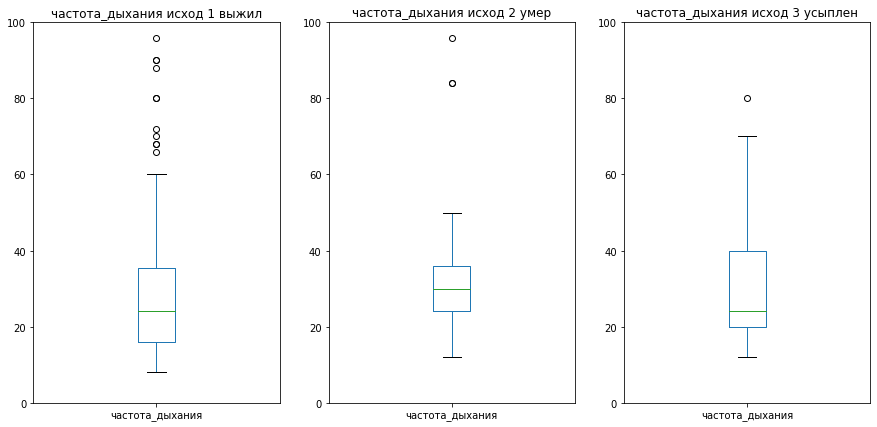

In [16]:
# частота дыхания по исходам

fig, axs = plt.subplots(3, 2, figsize=(15, 7))

plt.subplot (1, 3, 1)
df.loc[df.исход == 1, 'частота_дыхания'].plot(kind='box')
plt.title ("частота_дыхания исход 1 выжил")
plt.ylim([0, 100])

plt.subplot (1, 3, 2)
df.loc[df.исход == 2, 'частота_дыхания'].plot(kind='box')
plt.title ("частота_дыхания исход 2 умер")
plt.ylim([0, 100])

plt.subplot (1, 3, 3)
df.loc[df.исход == 3, 'частота_дыхания'].plot(kind='box')
plt.title ("частота_дыхания исход 3 усыплен")
plt.ylim([0, 100])

Text(0.5, 1.0, 'температура_конечностей исход 3 усыплен')

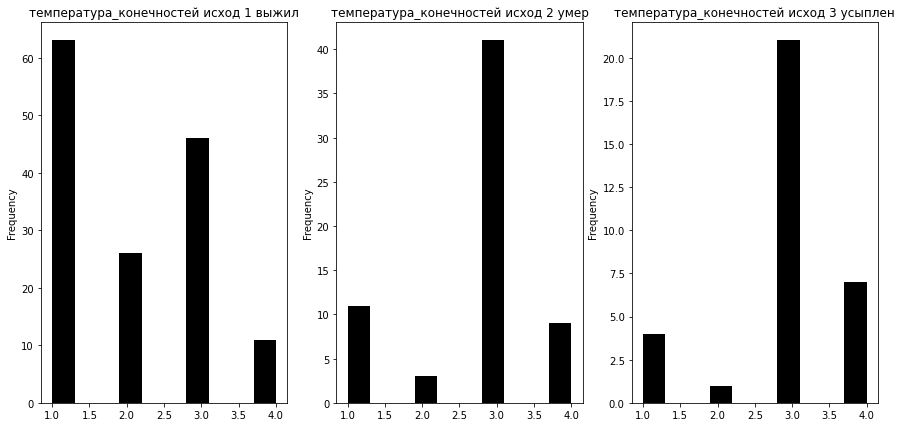

In [17]:
# температура конечностей по исходам

fig, axs = plt.subplots(3, 2, figsize=(15, 7))

plt.subplot (1, 3, 1)
df.loc[df.исход == 1, 'температура_конечностей'].plot(kind='hist', color='black')
plt.title ("температура_конечностей исход 1 выжил")

plt.subplot (1, 3, 2)
df.loc[df.исход == 2, 'температура_конечностей'].plot(kind='hist', color='black')
plt.title ("температура_конечностей исход 2 умер")

plt.subplot (1, 3, 3)
df.loc[df.исход == 3, 'температура_конечностей'].plot(kind='hist', color='black')
plt.title ("температура_конечностей исход 3 усыплен")


Text(0.5, 1.0, 'боль исход 3 усыплен')

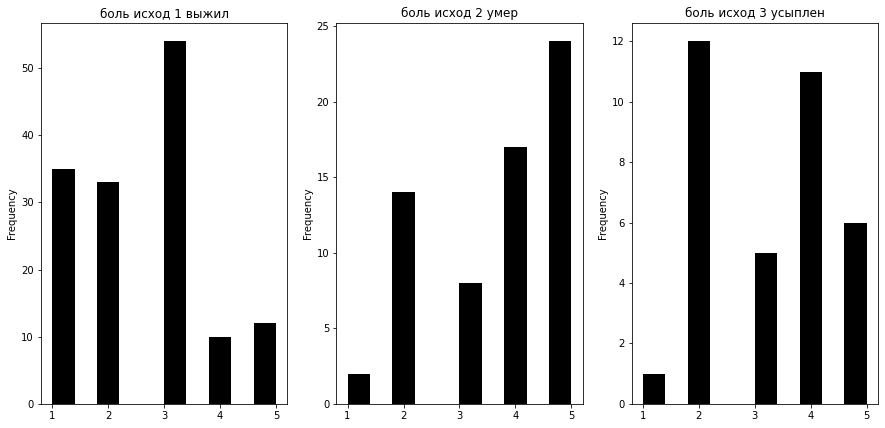

In [18]:
# боль по исходам

fig, axs = plt.subplots(3, 2, figsize=(15, 7))

plt.subplot (1, 3, 1)
df.loc[df.исход == 1, 'боль'].plot(kind='hist', color='black')
plt.title ("боль исход 1 выжил")

plt.subplot (1, 3, 2)
df.loc[df.исход == 2, 'боль'].plot(kind='hist', color='black')
plt.title ("боль исход 2 умер")

plt.subplot (1, 3, 3)
df.loc[df.исход == 3, 'боль'].plot(kind='hist', color='black')
plt.title ("боль исход 3 усыплен")

In [19]:
df.shape

(300, 8)

In [20]:
# Задание 3

In [21]:
df.isnull().sum()

операция                    1
Возраст                     0
ректальная_температура     60
пульс                      24
частота_дыхания            58
температура_конечностей    56
боль                       55
исход                       1
dtype: int64

In [22]:
# заполним интуитивно

#df.операция = df.операция.fillna()     одно значение просто выкинем

# заполним средним - распределение нормальное
df.ректальная_температура = df.ректальная_температура.fillna(df.ректальная_температура.mean())       

# заполним медианой по группам исхода
p1 = df.loc[df.исход == 1, 'пульс'].median()
p2 = df.loc[df.исход == 2, 'пульс'].median()
p3 = df.loc[df.исход == 3, 'пульс'].median()

df.loc[df.исход == 1, 'пульс'] = df.loc[df.исход == 1, 'пульс'].fillna(p1)
df.loc[df.исход == 2, 'пульс'] = df.loc[df.исход == 2, 'пульс'].fillna(p2)
df.loc[df.исход == 3, 'пульс'] = df.loc[df.исход == 3, 'пульс'].fillna(p3)


ch1 = df.loc[df.исход == 1, 'частота_дыхания'].median()
ch2 = df.loc[df.исход == 2, 'частота_дыхания'].median()
ch3 = df.loc[df.исход == 3, 'частота_дыхания'].median()

df.loc[df.исход == 1, 'частота_дыхания'] = df.loc[df.исход == 1, 'частота_дыхания'].fillna(ch1)
df.loc[df.исход == 2, 'частота_дыхания'] = df.loc[df.исход == 2, 'частота_дыхания'].fillna(ch2)
df.loc[df.исход == 3, 'частота_дыхания'] = df.loc[df.исход == 3, 'частота_дыхания'].fillna(ch3)



# заполним модой по группам исхода
te1 = df.loc[df.исход == 1, 'температура_конечностей'].mode()[0]
te2 = df.loc[df.исход == 2, 'температура_конечностей'].mode()[0]
te3 = df.loc[df.исход == 3, 'температура_конечностей'].mode()[0]

df.loc[df.исход == 1, 'температура_конечностей'] = df.loc[df.исход == 1, 'температура_конечностей'].fillna(te1)
df.loc[df.исход == 2, 'температура_конечностей'] = df.loc[df.исход == 2, 'температура_конечностей'].fillna(te2)
df.loc[df.исход == 3, 'температура_конечностей'] = df.loc[df.исход == 3, 'температура_конечностей'].fillna(te3)

pain1 = df.loc[df.исход == 1, 'боль'].mode()[0]
pain2 = df.loc[df.исход == 2, 'боль'].mode()[0]
pain3 = df.loc[df.исход == 3, 'боль'].mode()[0]

df.loc[df.исход == 1, 'боль'] = df.loc[df.исход == 1, 'боль'].fillna(pain1)
df.loc[df.исход == 2, 'боль'] = df.loc[df.исход == 2, 'боль'].fillna(pain2)
df.loc[df.исход == 3, 'боль'] = df.loc[df.исход == 3, 'боль'].fillna(pain3)


#df.исход = df.исход.fillna()            одно значение просто выкинем

In [23]:
df.isnull().sum()

операция                   1
Возраст                    0
ректальная_температура     0
пульс                      0
частота_дыхания            0
температура_конечностей    0
боль                       0
исход                      1
dtype: int64

In [24]:
df_end = df[(df.операция.notna()) & (df.исход.notna())].copy()

In [25]:
df_end.isnull().sum()

операция                   0
Возраст                    0
ректальная_температура     0
пульс                      0
частота_дыхания            0
температура_конечностей    0
боль                       0
исход                      0
dtype: int64

In [26]:
df.shape

(300, 8)

In [28]:
# выбросы по ректальной температуре возьмем исходя из гистограммы распределения значений
# пульс > 160               на основании бокс_плот
# частота дыхания > 75      на основании бокс_плот

df_end = df_end[(df_end.ректальная_температура > 35) & 
                (df_end.ректальная_температура < 40) & 
                (df_end.пульс < 160) & 
                (df_end.частота_дыхания < 75)].copy()

In [29]:
df_end.shape

(284, 8)

In [30]:
df_end

,операция,Возраст,ректальная_температура,пульс,частота_дыхания,температура_конечностей,боль,исход
0,2.0,1.0,38.500000,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.200000,88.0,20.0,3.0,3.0,3.0
2,2.0,1.0,38.300000,40.0,24.0,1.0,3.0,1.0
4,2.0,1.0,37.300000,104.0,35.0,3.0,5.0,2.0
5,2.0,1.0,38.167917,54.0,24.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,38.167917,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.200000,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.500000,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.500000,100.0,24.0,3.0,3.0,1.0
